In [ ]:
#export
from local.torch_basics import *
from local.test import *
from local.layers import *
from local.data.all import *
from local.optimizer import *
from local.learner import *

In [ ]:
from local.notebook.showdoc import *

In [ ]:
#default_exp callback.data

In [ ]:
from local.test_utils import *

In [ ]:
#export
class CollectDataCallback(Callback):
    "Collect all batches, along with `pred` and `loss`, into `self.data`"
    def begin_fit(self): self.data = L()
    def after_batch(self): self.data.append(to_detach(to_cpu((self.xb,self.yb,self.pred,self.loss))))

In [ ]:
#export
class WeightedSampleCallback(Callback):
    "Use weighted sampling in `DataLoader`"
    run_after=TrainEvalCallback

    def __init__(self, wgts, learn=None):
        self.set_wgts(wgts)
        self.learn = learn
    
    def set_wgts(self, wgts):
        wgts = array(wgts)
        self.wgts = wgts/wgts.sum()

    def get_idxs(self):
        n = self.dl.n
        return list(np.random.choice(n, n, p=self.wgts))
        
    def begin_fit(self):
        self.old_getidx = self.dl.get_idxs
        self.dl.get_idxs = self.get_idxs

    def after_fit(self): self.dl.get_idxs = self.old_getidx
    
    @property
    def dl(self): return self.learn.dbunch.train_dl

In [ ]:
#export
@patch
def weighted_sampler(self:Learner, wgts):
    self.add_cb(WeightedSampleCallback(wgts))
    return self

In [ ]:
n = 160

dbch = DataSource(torch.arange(n).float(), [[noop],[noop]], splits=[range(n),[]]) \
    .databunch(bs=16)
learn = synth_learner(data=dbch, cb_funcs=CollectDataCallback) \
    .weighted_sampler(range(n))

(#4) [0,7.058053077367644e+27,None,00:00]


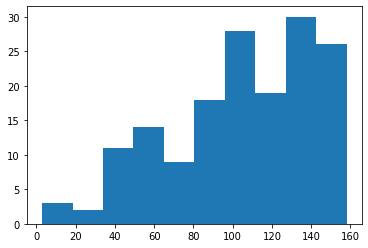

In [ ]:
learn.fit(1)
t = concat(*[o[0][0] for o in learn.collect_data.data])
plt.hist(t);

## Export -

In [ ]:
#hide
from local.notebook.export import notebook2script
notebook2script(all_fs=True)

Converted 00_test.ipynb.
Converted 01_core.ipynb.
Converted 01a_torch_core.ipynb.
Converted 02_script.ipynb.
Converted 03_dataloader.ipynb.
Converted 04_transform.ipynb.
Converted 05_data_core.ipynb.
Converted 06_data_transforms.ipynb.
Converted 07_vision_core.ipynb.
Converted 08_pets_tutorial.ipynb.
Converted 09_vision_augment.ipynb.
Converted 11_layers.ipynb.
Converted 11a_vision_models_xresnet.ipynb.
Converted 12_optimizer.ipynb.
Converted 13_learner.ipynb.
Converted 14_callback_schedule.ipynb.
Converted 14a_callback_data.ipynb.
Converted 15_callback_hook.ipynb.
Converted 16_callback_progress.ipynb.
Converted 17_callback_tracker.ipynb.
Converted 18_callback_fp16.ipynb.
Converted 19_callback_mixup.ipynb.
Converted 20_metrics.ipynb.
Converted 21_tutorial_imagenette.ipynb.
Converted 22_vision_learner.ipynb.
Converted 23_tutorial_transfer_learning.ipynb.
Converted 30_text_core.ipynb.
Converted 31_text_data.ipynb.
Converted 32_text_models_awdlstm.ipynb.
Converted 33_text_models_core.ipyn